# Wine Dataset
-

In [226]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [227]:
wine_df = pd.read_csv('wine.csv', index_col=0)
wine_df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la B√©gude


In [228]:
wine_df['points'].unique()

array([96, 95, 94, 90, 91, 86, 89, 88, 87, 93, 92, 85], dtype=int64)

### Data Cleaning

In [229]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1103 entries, 0 to 1102
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      1103 non-null   object 
 1   description  1103 non-null   object 
 2   designation  834 non-null    object 
 3   points       1103 non-null   int64  
 4   price        1046 non-null   float64
 5   province     1103 non-null   object 
 6   region_1     930 non-null    object 
 7   region_2     492 non-null    object 
 8   variety      1103 non-null   object 
 9   winery       1103 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 94.8+ KB


- Identifying coulumns that arae redundant or unnecessary. 
- Dropping the following columns: 'description','designation','region_1','region_2'

In [230]:
cols_to_drop = ['description','designation','region_1','region_2']

# Check if the columns to drop can be found in the wine_df
if any(col in wine_df.columns for col in cols_to_drop):
    wine_df.drop(columns=cols_to_drop,inplace=True)
wine_df.head(3)

,country,points,price,province,variety,winery
0,US,96,235.0,California,Cabernet Sauvignon,Heitz
1,Spain,96,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,US,96,90.0,California,Sauvignon Blanc,Macauley


##### Remove duplicates

In [231]:
wine_df = wine_df.drop_duplicates()
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1046 entries, 0 to 1102
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   1046 non-null   object 
 1   points    1046 non-null   int64  
 2   price     993 non-null    float64
 3   province  1046 non-null   object 
 4   variety   1046 non-null   object 
 5   winery    1046 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 57.2+ KB


#### Checking for null data

In [232]:
def null_data_check(dataframe):
    '''Used for checking data frame for nulls.'''
    # Checking for nulls
    # get the number of missing data points per column
    missing_values_count = dataframe.isnull().sum()

    num_col = dataframe.shape[1]
    # look at the # of missing points in the columns
    print(missing_values_count[0:num_col])

##### Dropping nulls

In [233]:
null_data_check(wine_df)

country      0
points       0
price       53
province     0
variety      0
winery       0
dtype: int64


In [234]:
wine_df = wine_df.dropna()
null_data_check(wine_df)

country     0
points      0
price       0
province    0
variety     0
winery      0
dtype: int64


##### Checking for unique series of values

In [235]:
for col in wine_df.columns:
    print(f'{col} : {wine_df[col].unique()}')

country : ['US' 'Spain' 'France' 'Italy' 'New Zealand' 'Bulgaria' 'Argentina'
 'Australia' 'Portugal' 'Israel' 'South Africa' 'Greece' 'Chile' 'Morocco'
 'Romania' 'Germany' 'Canada' 'Moldova' 'Hungary' 'Austria' 'Croatia'
 'Slovenia']
points : [96 95 94 90 91 86 89 88 87 93 92 85]
price : [235. 110.  90.  65.  66.  73.  60.  80.  48. 185. 325. 290.  75.  24.
  79. 220.  45.  57.  62. 105.  15.  37.  22.  42. 135.  29.  23.  17.
  26.  55.  39.  69.  30.  50.  40. 100.  68.  28.  18.  25.  36.  38.
  85.  19.  54.  59.  10.  12.  13.  14.  20. 125.   7.  49.  93.  32.
  16.  21.  44.  35.  61.  34.  11.  58. 120.  41. 200.  43.   9.  56.
  46.  92.  94.  27.  95.  33.  70. 155.  63. 130. 115.  31.  98.  52.
  64.  91. 111.  88.  74.  77.  87. 113. 140. 500.  51. 150. 240.  72.
 103.   8.]
province : ['California' 'Northern Spain' 'Oregon' 'Provence' 'Northeastern Italy'
 'Southwest France' 'Kumeu' 'Washington' 'Bulgaria' 'France Other'
 'Tuscany' 'Rh√¥ne Valley' 'Galicia' 'Andalucia' '

##### Creating wine points grouping

In [236]:
# Define bins for age groups
bins = [0, 70, 75, 80, 85, 90, 95, 100]
# Define labels for the age groups
#labels = ['0-70','70-74','75-79','80-84','85-89','90-94','95-100']
labels = ['Poor', 'Below Average', 'Average', 'Good', 'Very Good', 'Excellent', 'Exceptional']
#wine_df['points'] = wine_df['points'].astype('str')
wine_df.info()
# Create a new column 'Age_Group' by grouping ages into bins
wine_df['points-group'] = pd.cut(wine_df['points'], bins=bins, labels=labels, right=False)
wine_df.sort_values(by='points-group',ascending=False)


<class 'pandas.core.frame.DataFrame'>
Index: 993 entries, 0 to 1102
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   993 non-null    object 
 1   points    993 non-null    int64  
 2   price     993 non-null    float64
 3   province  993 non-null    object 
 4   variety   993 non-null    object 
 5   winery    993 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 54.3+ KB


,country,points,price,province,variety,winery,points-group
0,US,96,235.0,California,Cabernet Sauvignon,Heitz,Exceptional
14,US,95,185.0,Oregon,Pinot Noir,Domaine Serene,Exceptional
1,Spain,96,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodr√≠guez,Exceptional
24,US,95,45.0,California,Pinot Noir,Comartin,Exceptional
23,US,95,60.0,California,Chardonnay,Center of Effort,Exceptional
...,...,...,...,...,...,...,...
183,US,88,20.0,Washington,Picpoul,Syncline,Very Good
184,Argentina,88,26.0,Mendoza Province,Bordeaux-style Red Blend,Piattelli,Very Good
185,US,88,34.0,Washington,Bordeaux-style Red Blend,Pondera,Very Good
186,US,88,38.0,California,Zinfandel,Tobin James,Very Good


#### Data Exploration

##### Finding the most expensive wine

In [237]:
wine_df.loc[wine_df['price'].idxmax()]


country             Italy
points                 92
price               500.0
province         Piedmont
variety         Red Blend
winery               Gaja
points-group    Excellent
Name: 898, dtype: object

##### Finding the cheapest wine

In [238]:
wine_df.loc[wine_df['price'].idxmin()]

country                           Portugal
points                                  86
price                                  7.0
province                        Alentejano
variety                     Portuguese Red
winery          Adega Cooperativa de Borba
points-group                     Very Good
Name: 119, dtype: object

##### Finding the country with the cheapest wines

In [239]:
wine_df_grouped = wine_df.groupby('country')['price'].sum()

wine_df_grouped.sort_values(ascending=True).head(3)

country
Romania    18.0
Moldova    32.0
Morocco    35.0
Name: price, dtype: float64

##### Finding the country with the best quality wine

In [240]:
wine_df_grouped_points= wine_df.groupby('country')['points'].sum()
wine_df_grouped_points

country
Argentina        2182
Australia         537
Austria           279
Bulgaria          443
Canada            452
Chile            1615
Croatia           176
France          12189
Germany          2263
Greece            535
Hungary           182
Israel            627
Italy           12492
Moldova            90
Morocco            93
New Zealand        94
Portugal         5512
Romania           176
Slovenia           90
South Africa      854
Spain            5222
US              42965
Name: points, dtype: int64

##### Count the totals for each variet of wine

In [241]:
wine_df_grouped_variety= wine_df.groupby('variety')['variety'].count()
wine_df_grouped_variety.sort_values(ascending=False)

variety
Pinot Noir            117
Chardonnay             96
Cabernet Sauvignon     84
Red Blend              64
Riesling               47
                     ... 
Malagouzia              1
Kekfrankos              1
Gr√ºner Veltliner       1
Gros Manseng            1
Muscat                  1
Name: variety, Length: 119, dtype: int64

##### Find the top 10 provinces to produce the most wine

In [242]:
wine_df_grouped_province_most= wine_df.groupby('province')['province'].count()
wine_df_grouped_province_most.sort_values(ascending=False).head(10)

province
California          335
Oregon               72
Tuscany              63
Piedmont             50
Washington           43
Southwest France     35
Northern Spain       32
Bordeaux             27
Douro                21
Alsace               20
Name: province, dtype: int64

##### Find the top 10 provinces to produce the least amount of wine

In [243]:
wine_df_grouped_province_least= wine_df.groupby('province')['province'].count()
wine_df_grouped_province_least.sort_values(ascending=True).head(10)

province
Aconcagua Valley        1
Guerrouane              1
Italy Other             1
Judean Hills            1
Kumeu                   1
Languedoc-Roussillon    1
Levante                 1
Limar√≠ Valley          1
Lisboa                  1
Marchigue               1
Name: province, dtype: int64

##### Total number of wines per points-group

In [244]:
wine_df_grouped_points_group= wine_df.groupby('points-group')['points-group'].count()
wine_df_grouped_points_group

C:\Users\sheen\AppData\Local\Temp\ipykernel_33276\2965855251.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wine_df_grouped_points_group= wine_df.groupby('points-group')['points-group'].count()


points-group
Poor               0
Below Average      0
Average            0
Good               0
Very Good        402
Excellent        567
Exceptional       24
Name: points-group, dtype: int64

### Data Visualization and Analysis

#### Countries with the best wine
Countries with the best wine based on the points given to each wine.

C:\Users\sheen\AppData\Local\Temp\ipykernel_33276\2529398551.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='points', data=best_wine_country, palette='viridis')


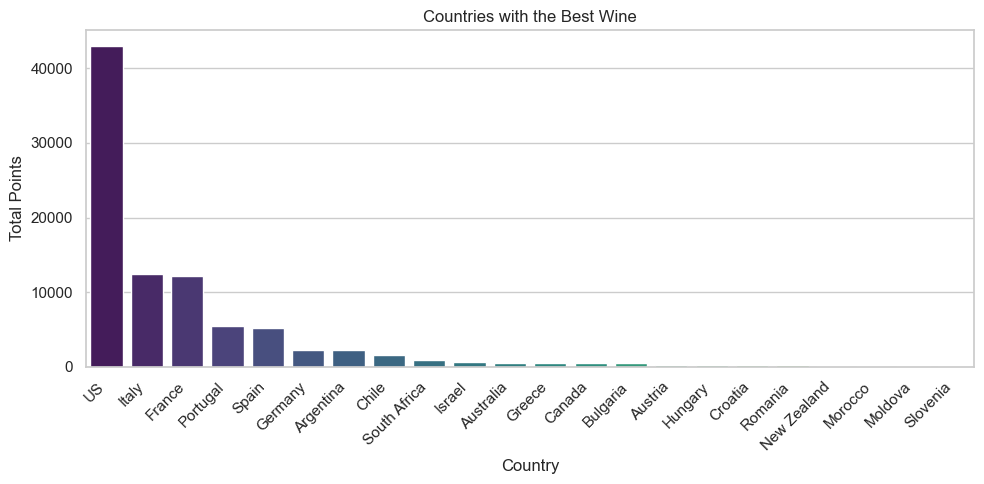

In [245]:
# Group by country and sum the points
best_wine_country = wine_df.groupby('country')['points'].sum().reset_index()

# Sort the data by the sum of points for better visualization
best_wine_country = best_wine_country.sort_values(by='points', ascending=False)

# Set the Seaborn theme
sns.set_theme(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x='country', y='points', data=best_wine_country, palette='viridis')

# Title and labels
plt.title('Countries with the Best Wine')
plt.xlabel('Country')
plt.ylabel('Total Points')
plt.xticks(rotation=45, ha='right')

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()

The graph shows us that the US is the favourite choice in wines it far exceeds the rest, while we can see that the next two countries after the US are more closely matched.

##### Countries with the most expensive wines

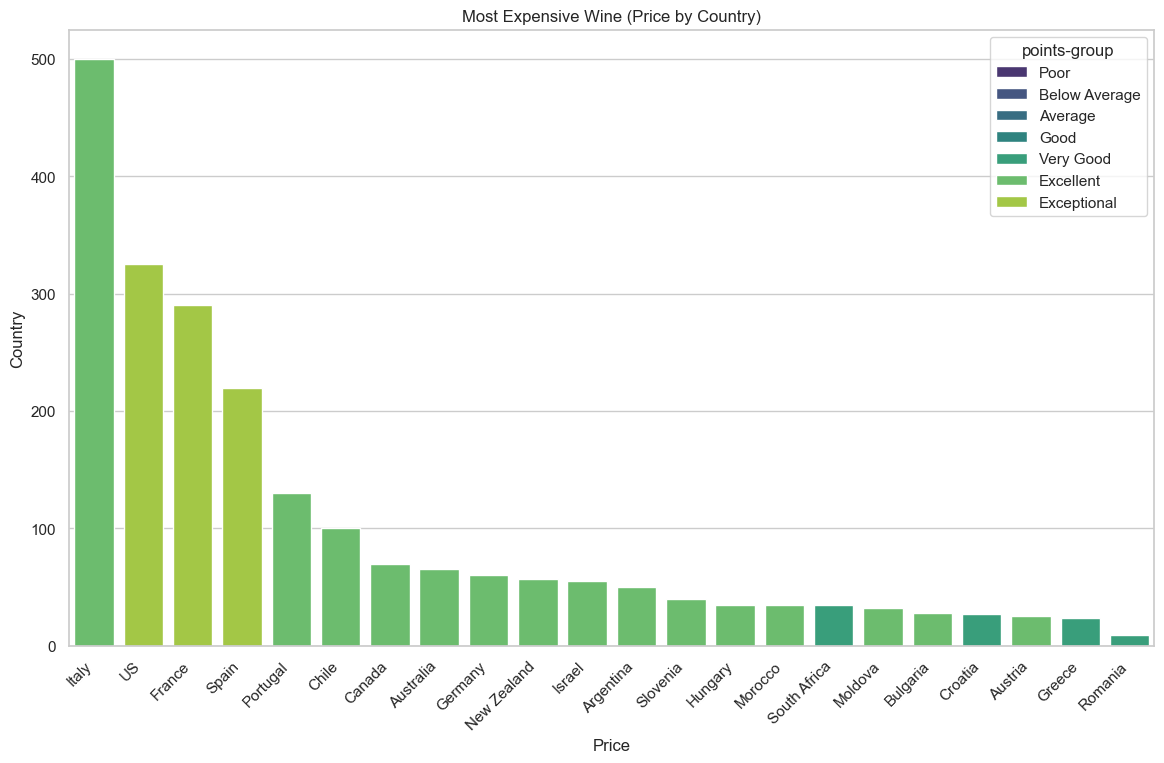

In [246]:
# Find the country with the most expensive wine
most_expensive_wine = wine_df.loc[wine_df['price'].idxmax()]
most_expensive_country = most_expensive_wine['country']
most_expensive_price = most_expensive_wine['price']

# Filter dataset to get the most expensive wine by country
most_expensive_by_country = wine_df.loc[wine_df.groupby('country')['price'].idxmax()]
# Sort the dataset by price
most_expensive_by_country = most_expensive_by_country.sort_values(by='price',ascending=False)

# Set the Seaborn theme
sns.set_theme(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(y='price', x='country',hue='points-group', data=most_expensive_by_country, palette='viridis')

# Labels and title
plt.xlabel('Price')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Country')
plt.title('Most Expensive Wine (Price by Country)')
plt.show()

We can see that Italy produced the most expensive wines but is not deemed the best quality. The US, France, and Spain produce some of the best wine that is far cheaper than the wine from Italy. This however does not mean that Italy's wine is of poor quality it falls just below the best quality of the wine. There are a lot of other countries that also produce great wine at varying price points.

##### Top 10 Provinces that produces the most wine

the points grouping with the most wine 

C:\Users\sheen\AppData\Local\Temp\ipykernel_33276\568068473.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='points-group',data=wine_df,palette='viridis')


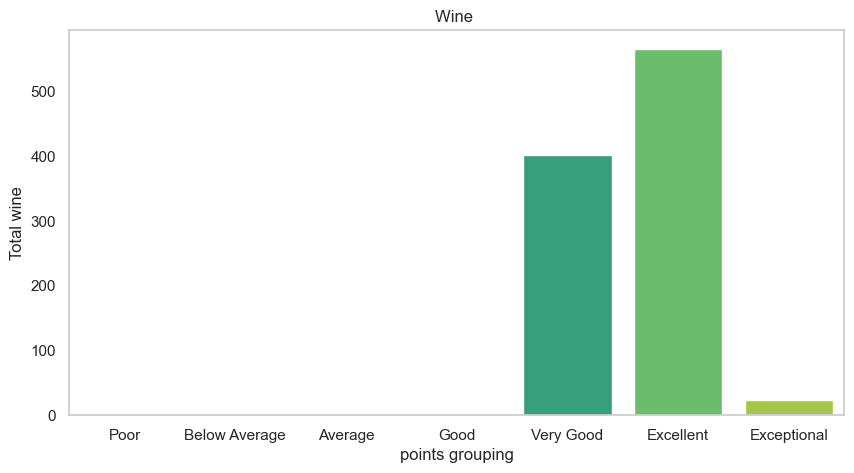

In [247]:
plt.figure(figsize=(10,5))

# Set the Seaborn theme
sns.set_theme(style="whitegrid")
sns.countplot(x='points-group',data=wine_df,palette='viridis')

plt.xlabel("points grouping")
plt.ylabel("Total wine")
plt.title("Wine ")

plt.grid(False)
plt.show()

Thr graph above displays that the most popular wine quality is excellent.

##### Top 10 wine varients

C:\Users\sheen\AppData\Local\Temp\ipykernel_33276\3819746447.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variety_counts.index, y=variety_counts.values, palette='viridis')


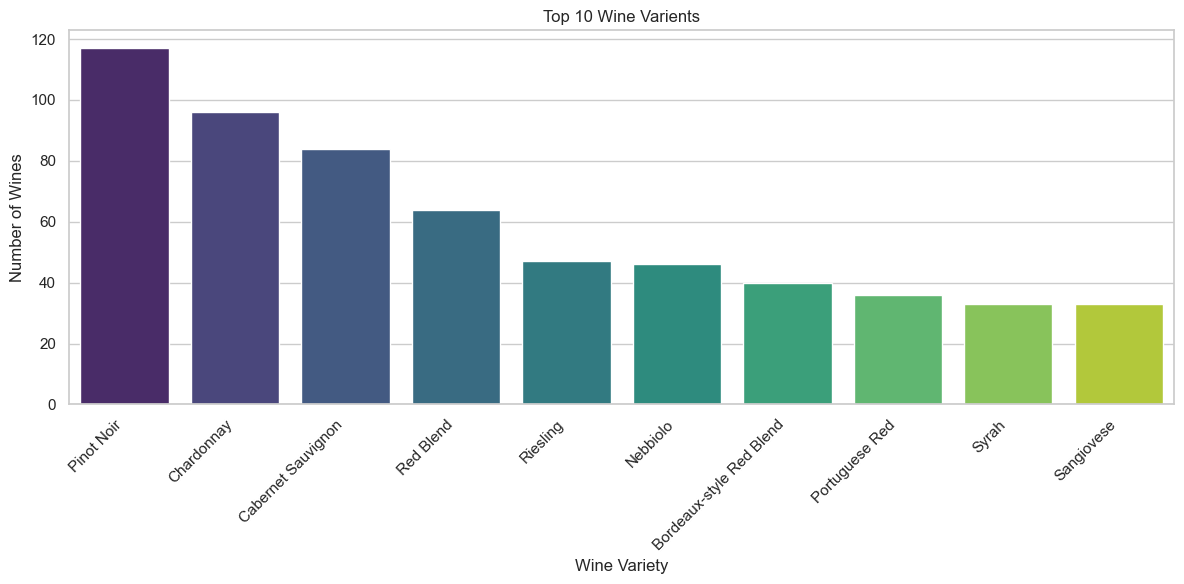

In [248]:
# Group by variety and count the number of wines for each variety
variety_counts = wine_df['variety'].value_counts().head(10)

# Select the top 10 wine varieties
top_10_varieties = variety_counts.head(10)

# Set the Seaborn theme
sns.set_theme(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=variety_counts.index, y=variety_counts.values, palette='viridis')

# Title and labels
plt.title('Top 10 Wine Varients')
plt.xlabel('Wine Variety')
plt.ylabel('Number of Wines')
plt.xticks(rotation=45, ha='right')

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()

The graph shows the top 10 wine variants and we can see that while Pinot Noir is the favourite the other wines follow closely.


#### Top 10 most expensive wines

C:\Users\sheen\AppData\Local\Temp\ipykernel_33276\1928415911.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='variety', y='price', data=top_10_expensive_varieties, palette='viridis')


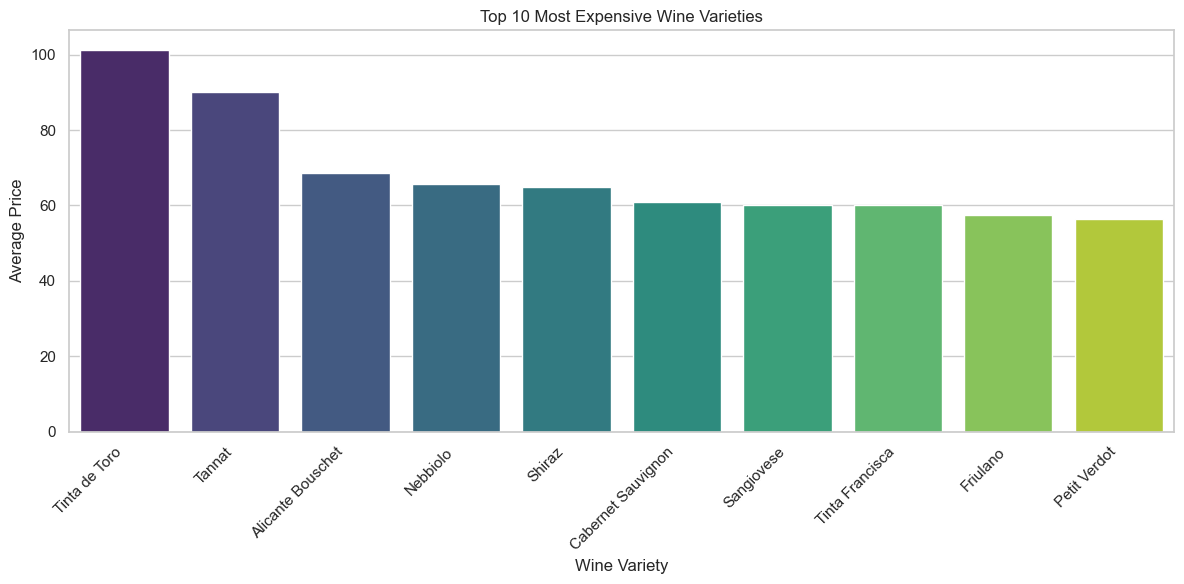

In [249]:
# Group by variety and calculate the average price for each variety
average_price_by_variety = wine_df.groupby('variety')['price'].mean().reset_index()

# Sort the data by the average price in descending order
average_price_by_variety = average_price_by_variety.sort_values(by='price', ascending=False)

# Select the top 10 most expensive wine varieties
top_10_expensive_varieties = average_price_by_variety.head(10)

# Set the Seaborn theme
sns.set_theme(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='variety', y='price', data=top_10_expensive_varieties, palette='viridis')

# Add title and labels
plt.title('Top 10 Most Expensive Wine Varieties')
plt.xlabel('Wine Variety')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()

This graph gives insight into the most expensive wine and based on the previous graph the only whine that appears in both is Cabernet Sauvignon. This wine was in the top 3 favourite variants.

##### Comparing the price points for the top 3 most popular wines

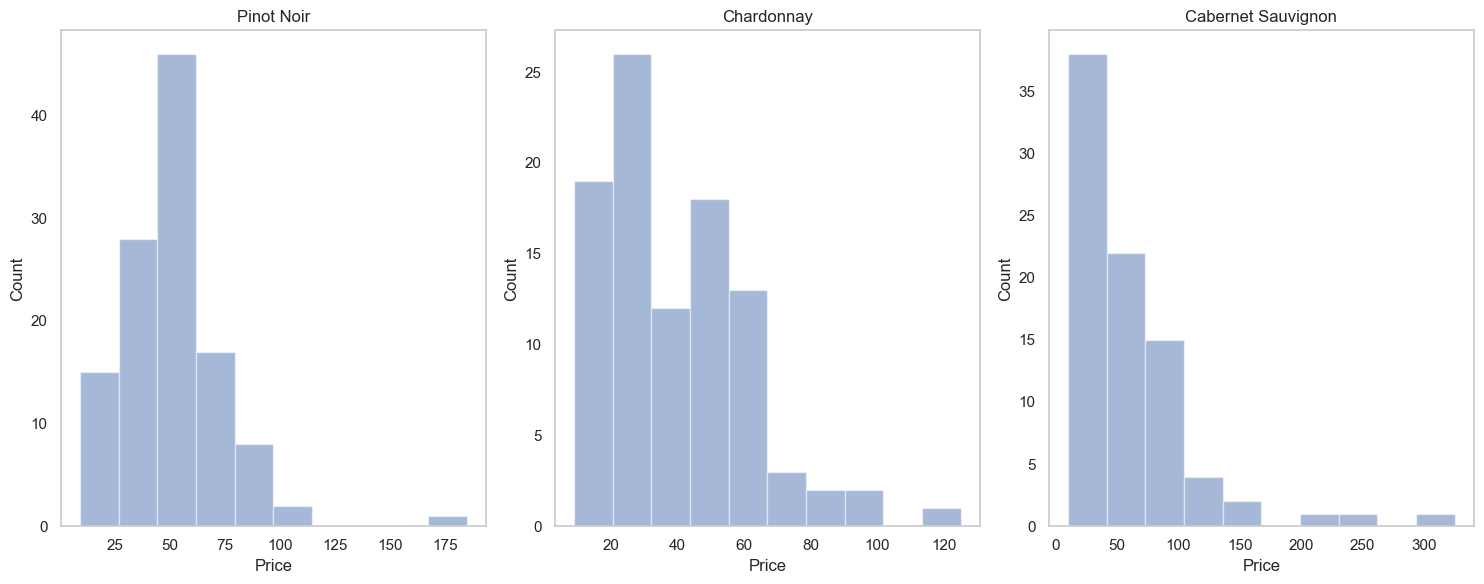

In [250]:
# Filter the wines Chardonnay, Pinot Noir, Cabernet Sauvignon
filtered_df_Pinot_Noir = wine_df[wine_df['variety'].isin(['Pinot Noir'])]
filtered_df_Chardonnay = wine_df[wine_df['variety'].isin(['Chardonnay'])]
filtered_df_Cabernet_Sauvignon = wine_df[wine_df['variety'].isin(['Cabernet Sauvignon'])]

# Create a subplot grid with 1 row and 3 columns
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.hist(filtered_df_Pinot_Noir["price"], alpha=0.5)
plt.title('Pinot Noir')
plt.grid(visible=False)
plt.xlabel('Price')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(filtered_df_Chardonnay["price"], alpha=0.5)
plt.title('Chardonnay')
plt.grid(visible=False)
plt.xlabel('Price')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(filtered_df_Cabernet_Sauvignon["price"], alpha=0.5)
plt.title('Cabernet Sauvignon')
plt.grid(visible=False)
plt.xlabel('Price')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

The graph above displays the relationship between price and popularity of the top 3 popular wines in the dataset. If we look at the most popular price point for each wine we can deduce the following:
- More People are willing to spend more on Pinot noir than the other two variants.
- While Cabernet Sauvignon might have the most expensive wines between the 3 variants the popular price point for this wine is the cheapest.
-Chardonnay has the widest range of popularity with regards to price point even though it can be noted that the $30 price is the most popular. 